# Week2授業課題２　富士下山問題

In [30]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from decimal import Decimal, ROUND_HALF_UP

### 【問題1】データの可視化

In [31]:
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

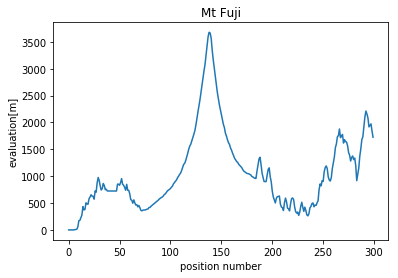

In [32]:
%matplotlib inline
#matplotlibでグラフ描写
plt.title("Mt Fuji")
plt.xlabel("position number")
plt.ylabel("evaluation[m]")
plt.plot(fuji[:, 0],fuji[:, 3])

### 【問題2】ある地点の勾配を計算する関数を作成

In [33]:
def compute_slope(position): # 今いる地点（= position）の傾きを算出
    # 標高の変化量
    position_amount = fuji[position, 0] - fuji[position - 1, 0]
    elevation_amount = fuji[position, 3] - fuji[position - 1, 3]

    slope = elevation_amount/position_amount # slope = 傾き

    return slope

position = 140

print("今いる地点{}の勾配は{}".format(position, compute_slope(position)))


今いる地点140の勾配は-97.13999999999987


### 【問題3】移動先の地点を計算する関数を作成

In [34]:
# 今いる地点 position,異動先の地点　next_position, ハイパーパラメータ　a=0.2

def move_point(position, a):
    next_position = position - (a*compute_slope(position)) # 移動先の地点を求める
    next_position = int(np.rint(next_position)) # もっとも近い整数に丸める
    if next_position not in fuji[:,0,]:
        return position
    else:
        return next_position

def print_move_point(position, a):
    if move_point(position,  a) == position:
        print("今いる地点は{}：下山しました".format(position))
    else:
        print("今いる地点は{}：移動先の地点は{}".format(position, move_point(position)))

position = 299
a = 0.2
print_move_point(position, a)

今いる地点は299：下山しました


### 【問題4】山を下る関数を作成

In [35]:
def down_mt_fuji(position): # 移動ごとの地点を求める関数
    position_list = [position] # 移動地点のリストを用意
    i = 0 # リストのインデックス
    
    #  今いる地点と移動先の地点が異なる間ループ
    while position_list[i] != move_point(position_list[i], a):
        # 移動地点リストに次の移動先の地点を追加
        position_list.append(move_point(position_list[i], a))
        i += 1
        # 移動地点のリスト内の値の重複を抽出
        loop_point = [x for x in set(position_list) if position_list.count(x) > 1]

        if  i ==  len(fuji): # 全ての地点の要素数(この場合３００）と同じ回数ループしたら終了 
            break
        elif len(loop_point) >= 1: # 移動地点が１回でも重複したら
            elevation_list = fuji[position_list, 3] # 移動地点ごとの標高リストを用意
            # 移動地点ごとの標高リストの最小値のインデックスを求める
            min_elevation = np.argmin(elevation_list)
            break
            return position_list[:min_elevation]
            
    return position_list

position = 136
a = 0.2
print("今いる地点は{}\n移動ごとのリストは\n{}".format(position, down_mt_fuji(position)))

今いる地点は136
移動ごとのリストは
[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


### 【問題5】下山過程の可視化

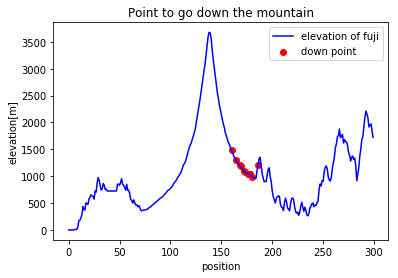

In [36]:
# 下山ポイントを点で可視化
position = 160
a = 0.2
down_point = down_mt_fuji(position) # 移動地点のリストを用意（グラフのx）
down_elevation_list = fuji[down_point, 3] # 移動地点ごとの標高リストを用意（グラフのy）

#print(down_point)
#print(elevation_list)    

%matplotlib inline

plt.title("Point to go down the mountain")
plt.xlabel("position") # その地点の番号
plt.ylabel("elevation[m]") # 標高
plt.plot(fuji[:,0,], fuji[:,3], color = "blue", label = "elevation of fuji")
plt.scatter(down_point, down_elevation_list, marker='o', color = "red", label = "down point")
plt.legend()
plt.show()

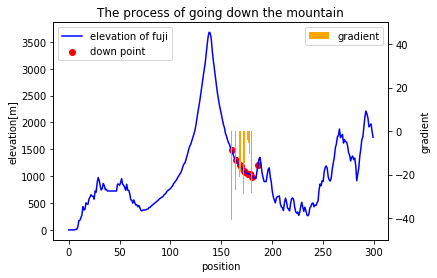

In [37]:
# 下山ポイントの勾配を折れ線グラフで可視化
down_gradient = [] # 勾配のリストを用意（折れ線グラフのy）
down_elevation_list = fuji[down_point, 3]  # 移動地点ごとの標高リスト
i = 0

for i in range(len(down_point)): # 移動地点リストの要素数分ループ処理
    down_gradient.append(compute_slope(down_point[i])) # 移動先の勾配をリストに追加
    
position = 138

#print(len(down_gradient))
#print(len(down_point))
#print(len(down_elevation_list))
#print(down_gradient)

#第一軸(ax1)と第二軸(ax2)を作って関連付ける
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#富士山の標高と移動地点の散布図とその標高を第一軸、地点ごとの勾配を第二軸の棒グラフに
ax1.plot(fuji[:,0,], fuji[:,3], color = "blue", label = "elevation of fuji")
ax1.scatter(down_point, down_elevation_list, marker='o', color = "red", label = "down point")
ax2.bar(down_point, down_gradient, color = "orange", label = "gradient")

#第２軸のy軸の範囲
ax2.set_ylim([-50,50])

# タイトル、軸ラベルを表示
plt.title("The process of going down the mountain")
ax1.set_xlabel("position") # その地点の番号
ax1.set_ylabel("elevation[m]") # 標高
ax2.set_ylabel('gradient') # 勾配

#凡例を表示（グラフ左上、ax2をax1のやや下に持っていく）
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

### 【問題6】初期値の変更

In [38]:
# 移動地点のリスト、移動地点ごとの標高リスト、勾配のリストを求める関数

def array_down_mountain(position):
    down_point = down_mt_fuji(position) # 移動地点のリストを用意（折れ線グラフのx）
    down_elevation_list = [] # 移動地点ごとの標高リストを用意（グラフのy）
    down_gradient = [] # 勾配のリストを用意（折れ線グラフのy）
    i = 0

    for i in range(len(down_point)): # 移動地点のリストの要素数分ループ処理
        down_elevation_list.append(fuji[down_point[i], 3]) # 標高リストに移動地点ごとの標高を追加

    for i in range(len(down_point)): # 移動地点リストの要素数分ループ処理
        down_gradient.append(compute_slope(down_point[i])) # 移動先の勾配をリストに追加

    return down_point, down_elevation_list, down_gradient

down_point_v, down_elevation_list_v, down_gradient_v = array_down_mountain(position)


In [39]:
# 初期値に対応した下山過程(標高：棒グラフ、勾配：折れ線グラフ）のグラフを表示する関数
def graph_down_mountain(position):
    %matplotlib inline
    down_point_v, down_elevation_list_v, down_gradient_v = array_down_mountain(position)

    #第一軸(ax1)と第二軸(ax2)を作って関連付ける
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    #富士山の標高と移動地点の散布図とその標高を第一軸、地点ごとの勾配を第二軸の棒グラフに
    ax1.plot(fuji[:,0,], fuji[:,3], color = "blue", label = "elevation of fuji")
    #ax1.bar(down_point_v, down_elevation_list_v, color = "orange",  label = "elevation of move_point")
    ax1.scatter(down_point_v, down_elevation_list_v, marker='o', color = "red", label = "down point")
    ax2.bar(down_point_v, down_gradient_v, color = "orange", label = "gradient")
    #第２軸のy軸の範囲
    ax2.set_ylim([-200,200])

    # タイトル、軸ラベルを表示
    plt.title("The process of going down the mountain")
    ax1.set_xlabel("position") # その地点の番号
    ax1.set_ylabel("elevation[m]") # 標高
    ax2.set_ylabel('gradient') # 勾配

    #凡例を表示（グラフ左上、ax2をax1のやや下に持っていく）
    ax1.legend(loc= 'upper left')
    ax2.legend(loc= 'lower left')
    plt.show()


今いる地点200の場合の下山過程


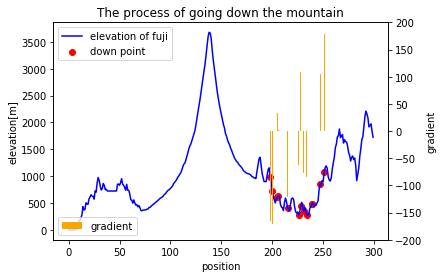

In [40]:
# 初期値200の場合

position = 200
#print(down_elevation_list_v)

print("今いる地点{}の場合の下山過程".format(position))
graph_down_mountain(position)

今いる地点170の場合の下山過程


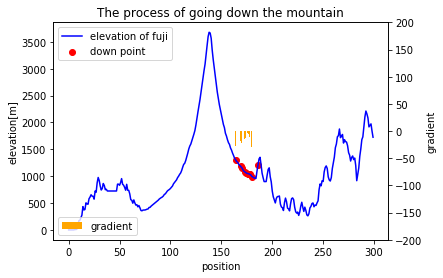

In [41]:
# 初期値170の場合

position = 170

print("今いる地点{}の場合の下山過程".format(position))
graph_down_mountain(position)

### 【問題7】（アドバンス問題）ハイパーパラメータの変更

今いる地点136、ハイパーパラメータ0.1の場合の下山過程


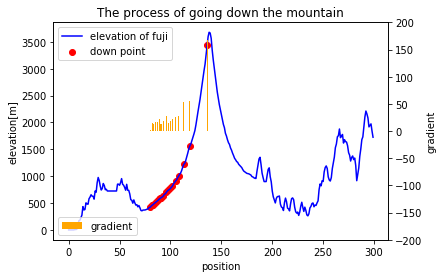

In [42]:
# ハイパーパラメータa = 0.05の場合
position = 136
a = 0.1

print("今いる地点{}、ハイパーパラメータ{}の場合の下山過程".format(position, a))
graph_down_mountain(position)

今いる地点136、ハイパーパラメータ0.3の場合の下山過程


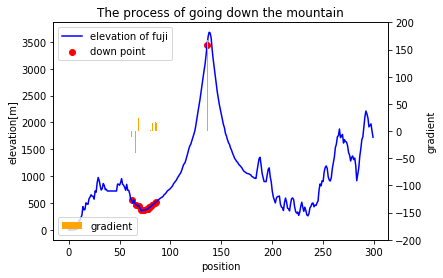

In [43]:
# ハイパーパラメータ a = 0.7の場合
position = 136
a = 0.3

print("今いる地点{}、ハイパーパラメータ{}の場合の下山過程".format(position, a))
graph_down_mountain(position)

今いる地点136、ハイパーパラメータ0.71の場合の下山過程


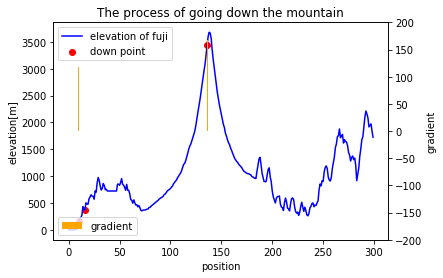

In [44]:
# ハイパーパラメータ a = 0.71の場合
position = 136
a = 0.71

print("今いる地点{}、ハイパーパラメータ{}の場合の下山過程".format(position, a))
graph_down_mountain(position)